## (A) Implement a CNN architecture for FashionMNIST dataset (15 points)


*   Basic CNN architecture (5 points)
*   Include at least one layer of
      1.   ResNet module (5 points)
      2.   Inception Module (5 points)

## (B) Compare the performance of your CNN architecture with "best" architecture from HW2. (5 points)
You can reimplement your HW2 architecture in Keras to make the comparison fair.  


Note: The code is compatible with version 1.x of tensorflow

In [0]:
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

1.15.2


In [0]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train.shape

Using TensorFlow backend.


(60000, 28, 28)

In [0]:
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data prepocessing

In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print("training data shape", x_train.shape)
print("tesing data shape",x_test.shape)

training data shape (60000, 28, 28)
tesing data shape (10000, 28, 28)


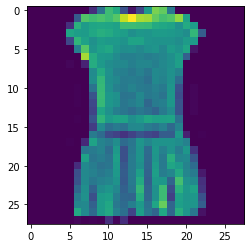

In [0]:
plt.imshow(x_train[3, :].reshape((28, 28)))

# Random Shuffling of the data set

In [0]:
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
data_input = x_train[indices]
labels = y_train[indices]

sample_size = 60000-int(60000*0.01)
x_train = data_input[:sample_size]
y_train = labels[:sample_size]
x_vali = data_input[sample_size:60000]
y_vali = labels[sample_size: 60000]

In [0]:
img_rows, img_cols = 28, 28
# 1 channel (grayscale, 3 in the case of color, 1 each for Red, Green and Blue)
input_shape = (img_rows, img_cols, 1)   

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_vali = x_vali.reshape(x_vali.shape[0], img_rows, img_cols, 1)

print("reshaped training data shape", x_train.shape)
print("reshaped testing data shape",x_test.shape)
print("reshaped validate data shape",x_vali.shape)

reshaped training data shape (59400, 28, 28, 1)
reshaped testing data shape (10000, 28, 28, 1)
reshaped validate data shape (600, 28, 28, 1)


# Importing All Required Libraries

In [0]:
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D, Activation,Input
from keras.layers.normalization import BatchNormalization
from keras import optimizers
import keras


In [0]:
batch_size = 32
num_classes = 10
epochs = 1000

# Network Architecture 

# INPUT --->layer(Inception Module) --->layer(Restnet Module) --->layers of (Basic CNN)--->flatten---> softmax--->OUTPUT

In [0]:
#input is the same for the CNN model
inputs = Input(shape=(28,28,1))

#adding inception module at the first layer
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(inputs) #64 filters or convolutions of (1,1)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1) #64 filters or convolutions  of (3,3)

tower_2 = Conv2D(64, (1,1), padding='same', activation='relu')(inputs) # 64 filters of (1,1)
tower_2 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_2) # 64 filters of (5,5)

tower_3 = MaxPooling2D((3,3), padding='same', strides=(1,1))(inputs)
tower_3 = Conv2D(64, (1,1),   padding='same', activation='relu')(tower_3)

l_1_out = keras.layers.concatenate([tower_1,tower_2,tower_3],axis=1)

#Resnet Implementation
l2 = Conv2D(64,(3,3))(l_1_out)
l2 = Activation('relu')(l2)
l2 = MaxPooling2D(pool_size=(2,2))(l2)
l2_out_f = Dropout(0.5)(l2)
l3_intermediate = Conv2D(64,(3,3),padding='same',activation='relu')(l2_out_f)
l3_out = keras.layers.add([l2_out_f,l3_intermediate])

l4_out = Conv2D(64,(3,3),padding='same',activation='relu')(l3_out)
l4_out = Dropout(0.5)(l4_out)

l5_out = Conv2D(64,(3,3),padding='same',activation='relu')(l4_out)
l5_out = Dropout(0.5)(l5_out)

l6_out = Conv2D(64,(3,3),padding='same',activation='relu')(l5_out)

out = Flatten()(l6_out)
output = Dense(10)(out)
output = Activation('softmax')(output)
model = Model([inputs],output)
model.summary()
model.compile(loss='categorical_crossentropy',optimizer = optimizers.Adam(lr = 0.001),metrics=['accuracy'])











Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 64)   128         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 28, 28, 64)   128         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 28, 28, 1)    0           input_

In [0]:
# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',min_delta=0,patience=2,verbose=0, mode='auto')

history = model.fit(x_train, y_train, batch_size = batch_size,
        epochs=epochs, verbose=1,validation_data=(x_vali, y_vali),callbacks=[es])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 59400 samples, validate on 600 samples
Epoch 1/1000





59400/59400 [==============================] - 65s 1ms/step - loss: 0.4701 - acc: 0.8304 - val_loss: 0.3429 - val_acc: 0.8817
Epoch 2/1000
59400/59400 [==============================] - 51s 867us/step - loss: 0.3107 - acc: 0.8878 - val_loss: 0.3165 - val_acc: 0.8900
Epoch 3/1000
59400/59400 [==============================] - 52s 868us/step - loss: 0.2754 - acc: 0.9001 - val_loss: 0.2692 - val_acc: 0.9000
Epoch 4/1000
59400/59400 [==============================] - 51s 864us/step - loss: 0.2583 - acc: 0.9064 - val_loss: 0.2550 - val_acc: 0.9117
Epoch 5/1000
59400/59400 [==============================] - 51s 862us/step - loss: 0.2485 - acc: 0.9089 - val_loss: 0.2374 - val_acc: 0.9183
Epoch 6/1000
59400/59400 [==============================] - 51s 862us/step - loss: 0.2409 - acc: 0.9118 - val_loss: 0.2279 - val_acc: 0.9250
Epoch 

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

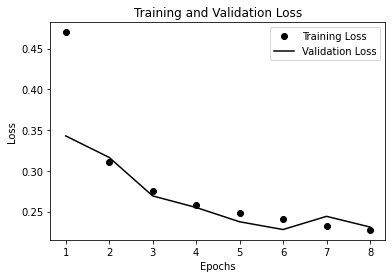

In [0]:
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'ko', label = 'Training Loss')
plt.plot(epochs, val_loss, 'k', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

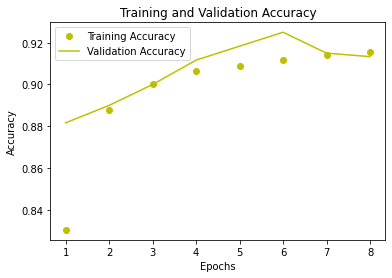

In [0]:
plt.plot(epochs, acc, 'yo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'y', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Model accuracy with test data

In [0]:
scores = model.evaluate(x=x_test, y=y_test)
print("The accuracy of the model with test data "+ str(scores[1]*100)+ " %")

10000/10000 [==============================] - 3s 259us/step
The accuracy of the model with test data 91.28 %


# Observations and Things Learnt from the implementation:


1) Initially tried the model with out GPU which took longer execution time,adding GPU speeded up the exection 

2) tried with different batch sizes lower batch size better learning when compared to high batch size

2)Initially implemented with out Dropout features which brought instabilities in learning but adding drop out features helped in better training of the network

    a) better learning

    b) increased number of epochs (in a positive way) as the epochs increase   better accuracy
  

3)The model with out early stopping was getting over fitting the feature early stopping helped the model stop at the right option where over fitting is avoided

4) Increasing the layers increased the number of parameters to be learnt and is in proportional with execution time i.e more layers more execution time

5) But increasing the layers increased the stability in learning or training the model

6)Add certain point increasing layers didnot help as there is no improvement in learning or training of the model 


# HW - 2 Implementation with keras


In [0]:
!pip install sklearn
!pip install pandas
!pip install numpy

In [0]:
!pip install keras tensorflow numpy mnist

  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=120f25ba8f9d41624e795c1fd10302807999fc21b6403169f896cecfdf9e4f5f
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3


In [0]:
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import to_categorical

x_train = mnist.train_images()
y_train = mnist.train_labels()
x_test  = mnist.test_images()
y_test  = mnist.test_labels()

# Normalize the images.
x_train = (x_train / 255)
x_test  = (x_test / 255) 




# Shuffling the train data

In [0]:
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
data_input = x_train[indices]
labels = y_train[indices]

sample_size = 60000-int(60000*0.01)
x_train = data_input[:sample_size]
y_train = labels[:sample_size]
x_vali = data_input[sample_size:60000]
y_vali = labels[sample_size: 60000]

# Flatten the images.
x_train = x_train.reshape((-1, 784))
x_test  = x_test.reshape((-1, 784))
x_vali  = x_vali.reshape((-1,784))

In [0]:
batch_size = 32
num_classes = 10
epochs = 1000

Implementing fully connected layers with 3 dense layers of 64 unit,32 units,10 units respectively with learning rate or lr of 0.0001 and iterations 1000 and early stopping to see no overfitting with l2 regularisation

In [0]:
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras import regularizers
es = EarlyStopping(monitor='val_loss',min_delta=0,patience=2,verbose=0, mode='auto')


# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dropout(0.5),
  Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  Dropout(0.5),
  Dense(10, activation='softmax'),
])
adamOpti = optimizers.Adam(lr = 0.0001)
model.compile(optimizer= adamOpti,loss='categorical_crossentropy',metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',min_delta=0,patience=2,verbose=0, mode='auto')
# Train the model.
history= model.fit(x_train, to_categorical(y_train),batch_size = batch_size,epochs=epochs, verbose=1,validation_data=(x_vali, to_categorical(y_vali)),callbacks=[es])



Train on 59400 samples, validate on 600 samples
Epoch 1/1000
59400/59400 [==============================] - 8s 141us/step - loss: 2.0240 - acc: 0.4036 - val_loss: 1.1749 - val_acc: 0.8117
Epoch 2/1000
59400/59400 [==============================] - 8s 129us/step - loss: 1.2853 - acc: 0.6542 - val_loss: 0.7348 - val_acc: 0.8800
Epoch 3/1000
59400/59400 [==============================] - 8s 131us/step - loss: 1.0186 - acc: 0.7374 - val_loss: 0.5766 - val_acc: 0.9000
Epoch 4/1000
59400/59400 [==============================] - 8s 132us/step - loss: 0.8819 - acc: 0.7784 - val_loss: 0.4943 - val_acc: 0.9067
Epoch 5/1000
59400/59400 [==============================] - 8s 130us/step - loss: 0.8039 - acc: 0.8003 - val_loss: 0.4410 - val_acc: 0.9100
Epoch 6/1000
59400/59400 [==============================] - 8s 129us/step - loss: 0.7428 - acc: 0.8166 - val_loss: 0.3942 - val_acc: 0.9200
Epoch 7/1000
59400/59400 [==============================] - 8s 134us/step - loss: 0.6983 - acc: 0.8267 - val_los

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

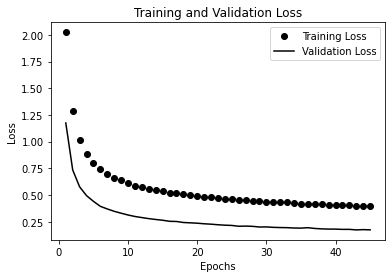

In [0]:
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'ko', label = 'Training Loss')
plt.plot(epochs, val_loss, 'k', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

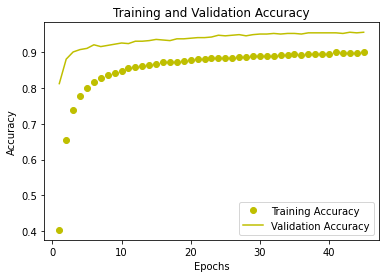

In [0]:
plt.plot(epochs, acc, 'yo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'y', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

Now implementing the same with increased number of dense layers and different learning rate and adding l2 regularization

Increasing the number of dense layers and trying with different learning rate i.e 0.001

4 hidden layers 

In [0]:
batch_size = 32
num_classes = 10
epochs = 1000

In [0]:
# Build the model.
model = Sequential([
  Dense(32, activation='relu', input_shape=(784,)),
  Dropout(0.2),
  Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  Dropout(0.2),
  Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  Dropout(0.2),
  Dense(10, activation='softmax'),
])
adamOpti = optimizers.Adam(lr = 0.0001)
model.compile(optimizer= adamOpti,loss='categorical_crossentropy',metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',min_delta=0,patience=2,verbose=0, mode='auto')
# Train the model.
history= model.fit(x_train, to_categorical(y_train),batch_size = batch_size,epochs=epochs, verbose=1,validation_data=(x_vali, to_categorical(y_vali)),callbacks=[es])

Train on 59400 samples, validate on 600 samples
Epoch 1/1000
59400/59400 [==============================] - 9s 153us/step - loss: 1.9617 - acc: 0.6180 - val_loss: 1.0578 - val_acc: 0.8683
Epoch 2/1000
59400/59400 [==============================] - 9s 144us/step - loss: 1.0645 - acc: 0.8150 - val_loss: 0.7512 - val_acc: 0.8917
Epoch 3/1000
59400/59400 [==============================] - 9s 150us/step - loss: 0.8296 - acc: 0.8458 - val_loss: 0.5900 - val_acc: 0.9133
Epoch 4/1000
59400/59400 [==============================] - 9s 149us/step - loss: 0.7000 - acc: 0.8639 - val_loss: 0.5050 - val_acc: 0.9150
Epoch 5/1000
59400/59400 [==============================] - 9s 147us/step - loss: 0.6206 - acc: 0.8732 - val_loss: 0.4549 - val_acc: 0.9200
Epoch 6/1000
59400/59400 [==============================] - 9s 147us/step - loss: 0.5672 - acc: 0.8818 - val_loss: 0.4122 - val_acc: 0.9283
Epoch 7/1000
59400/59400 [==============================] - 8s 143us/step - loss: 0.5278 - acc: 0.8872 - val_los

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

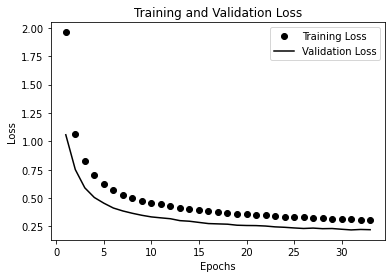

In [0]:
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'ko', label = 'Training Loss')
plt.plot(epochs, val_loss, 'k', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

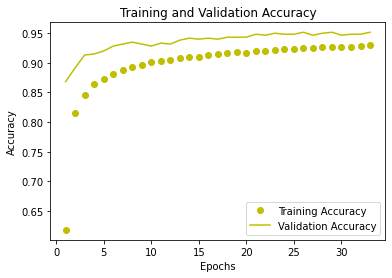

In [0]:
plt.plot(epochs, acc, 'yo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'y', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32)                25120     
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

In [0]:
score = model.evaluate(x_test,to_categorical(y_test))
print("Test Score Accuracy ")
score[1]

10000/10000 [==============================] - 0s 48us/step
Test Score Accuracy 


0.9536

In [0]:
# Predict on the first 5 test images.
predictions = model.predict(x_test[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(y_test[:5]) # [7, 2, 1, 0, 4]

[7 2 1 0 4]
[7 2 1 0 4]


Increasing the number of hidden layers increased the accuracy and the model trained well with increase in the layers and hidden units for lr = 0.0001 and l2 regularization

# Comparison of two implementations

Comparison between problems on home work 2 and home work 3  there is faster learning in Convolution networks on images than ANN this is what i understand because the model is showing high accuracy in less number of iterations or epochs in CNN,In ANN the iterations taken are more for learning.Both models in in comparison of accuracy are showing 90+ % with te implementation of keras 